# Project Title: Hotel Reservation Status Prediction Using Classification and Ensemble Methods

# Problem Statement:

Hotels often face uncertainties with reservations leading to cancellations, no-shows, or successful check-outs. This project focuses on analyzing hotel booking data and building robust classification models, including ensemble techniques, to accurately predict reservation outcomes. The objective is to assist hotel management in proactive decision-making and resource optimization.

# Step 1: Import Required Libraries

In [ ]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  # Added KNN model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 2: Load the Dataset

In [ ]:
#Load and Inspect the Dataset
df = pd.read_csv('/content/hotel_bookings.csv')

# Step 3: Display Dataset Information

In [ ]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Drop 'reservation_status_date' as it's unnecessary
df.drop(columns=['reservation_status_date'], inplace=True)

In [ ]:
# Print dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 119390 rows and 31 columns.


In [ ]:
# Display first and last five rows
print("First 5 Rows:")
display(df.head())

First 5 Rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out


In [ ]:
print("Last 5 Rows:")
display(df.tail())

Last 5 Rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out


# Step 4: Check for Missing Values

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1634

# Step 5: Display Data Types & Statistics

In [ ]:
# Data types of columns
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent          

In [ ]:
# Summary statistics
print("\nStatistical Summary:\n")
display(df.describe())


Statistical Summary:



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Step 6: Defining Features (X) and Target (y)

In [ ]:
# Define Features (X) and Target (y)
X = df.drop(columns=['reservation_status'])
y = df['reservation_status']  # Multi-class classification target

In [ ]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 7: Handle Missing Values

In [ ]:
# Handle Missing Values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Step 8: Exploratory Data Analysis (EDA) - Enhanced Visualizations

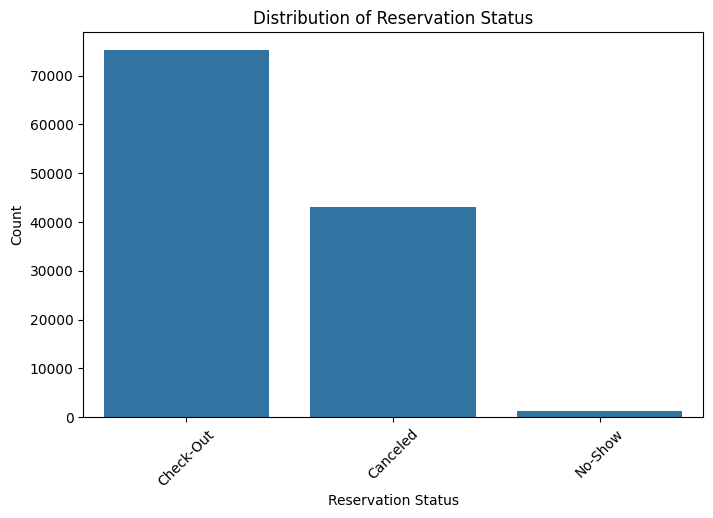

In [ ]:
# Bar Chart - Reservation Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="reservation_status")
plt.title("Distribution of Reservation Status")
plt.xlabel("Reservation Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

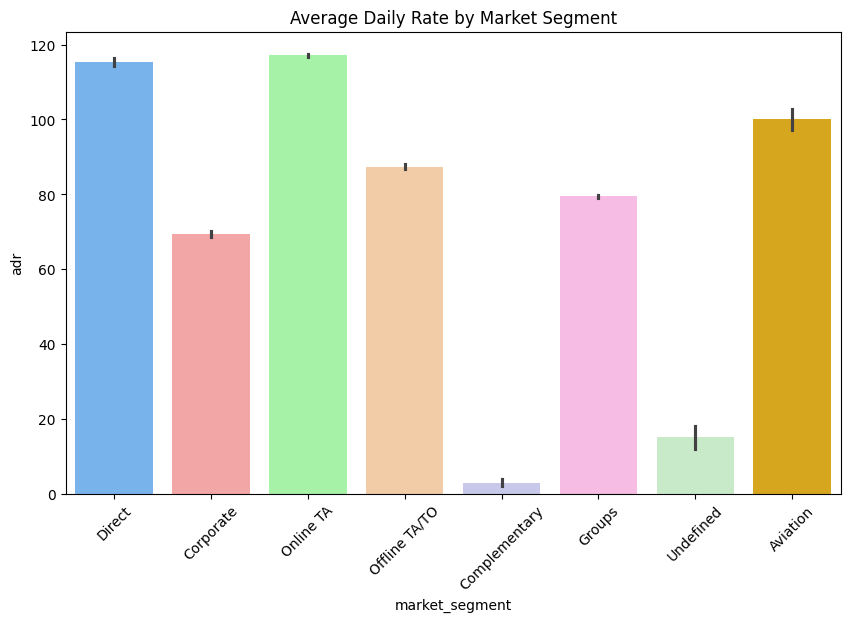

In [ ]:
custom_colors_bar = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#f4b400']
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=df, hue='market_segment', palette=custom_colors_bar, legend=False)
plt.title("Average Daily Rate by Market Segment")
plt.xticks(rotation=45)
plt.show()

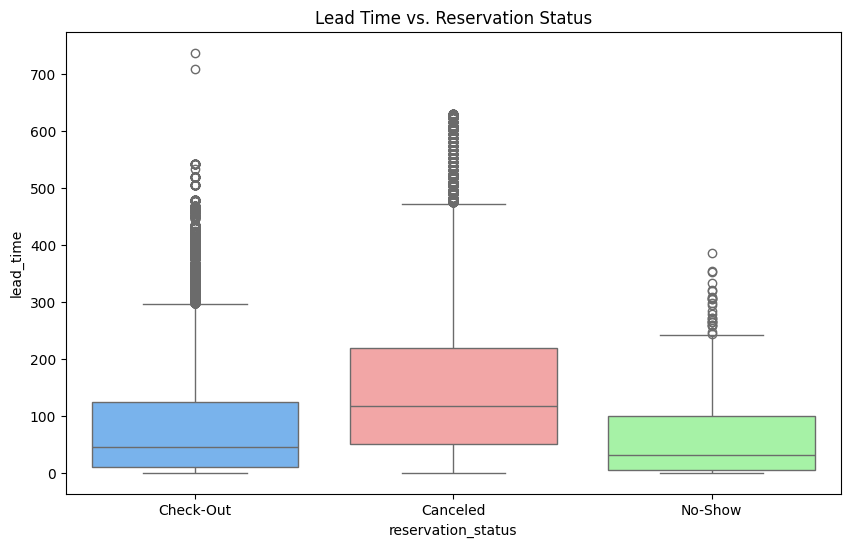

In [ ]:
custom_colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.figure(figsize=(10, 6))
sns.boxplot(x='reservation_status', y='lead_time', data=df, hue='reservation_status', palette=custom_colors, legend=False)
plt.title("Lead Time vs. Reservation Status")
plt.show()

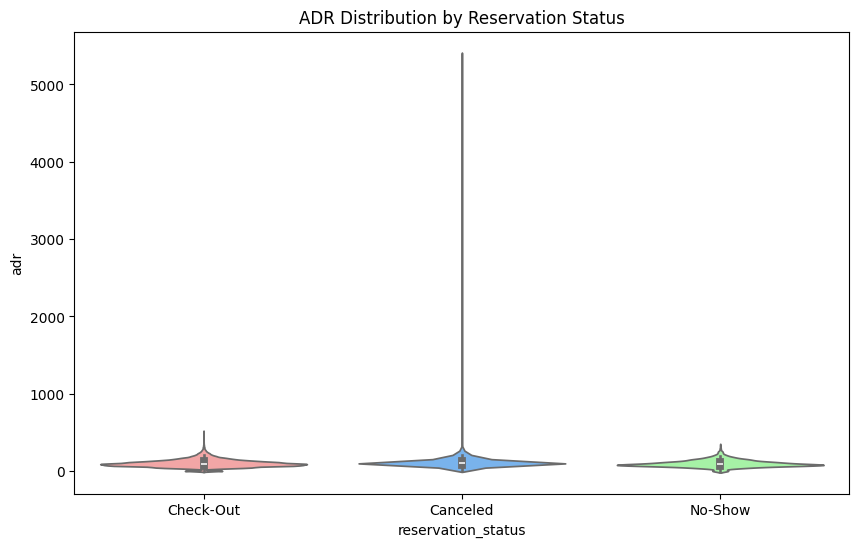

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='reservation_status', y='adr', data=df, hue='reservation_status', palette=['#ff9999', '#66b3ff', '#99ff99'], legend=False)
plt.title("ADR Distribution by Reservation Status")
plt.show()

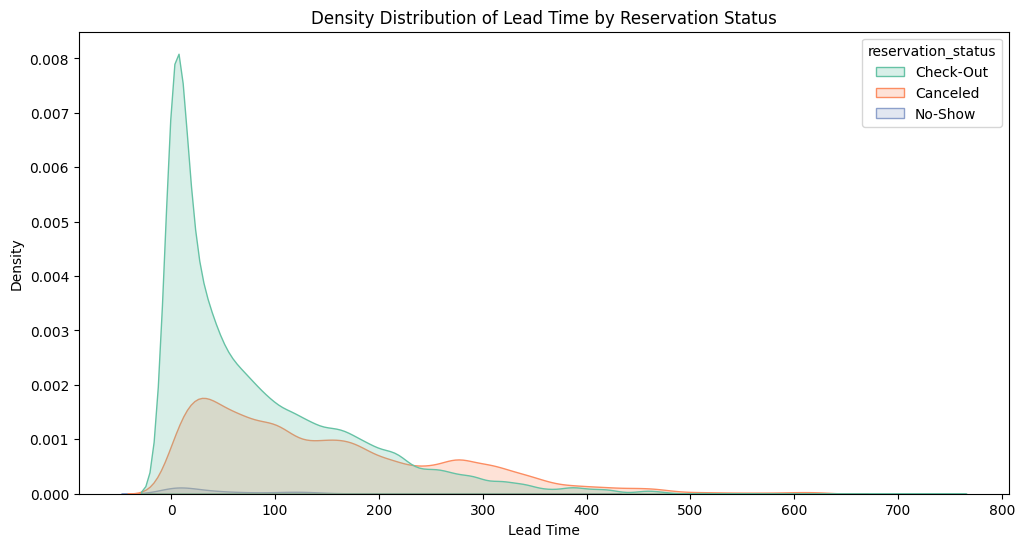

In [ ]:
# 🔹 KDE Plot - Lead Time Density by Reservation Status
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="lead_time", hue="reservation_status", fill=True, palette="Set2")
plt.title("Density Distribution of Lead Time by Reservation Status")
plt.xlabel("Lead Time")
plt.ylabel("Density")
plt.show()

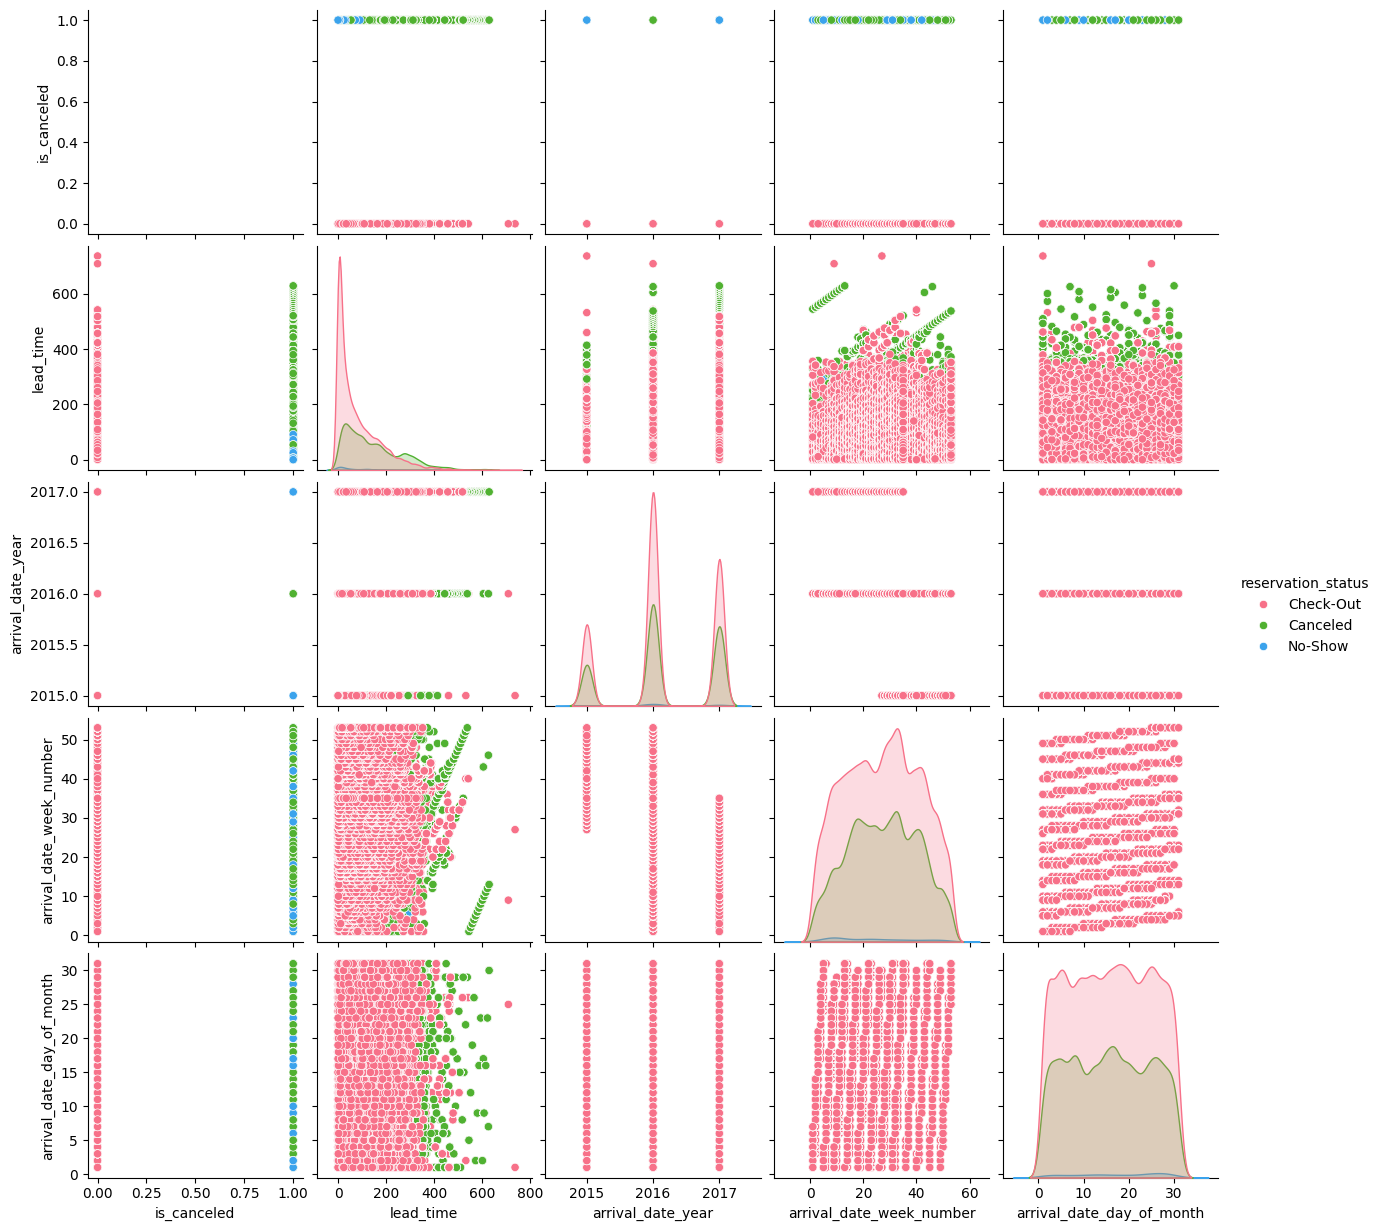

In [ ]:
# 🔹 Pair Plot - Relationship Between Features
sns.pairplot(df[[*num_cols[:5], 'reservation_status']].dropna(),
             diag_kind="kde", hue="reservation_status", palette="husl")
plt.show()

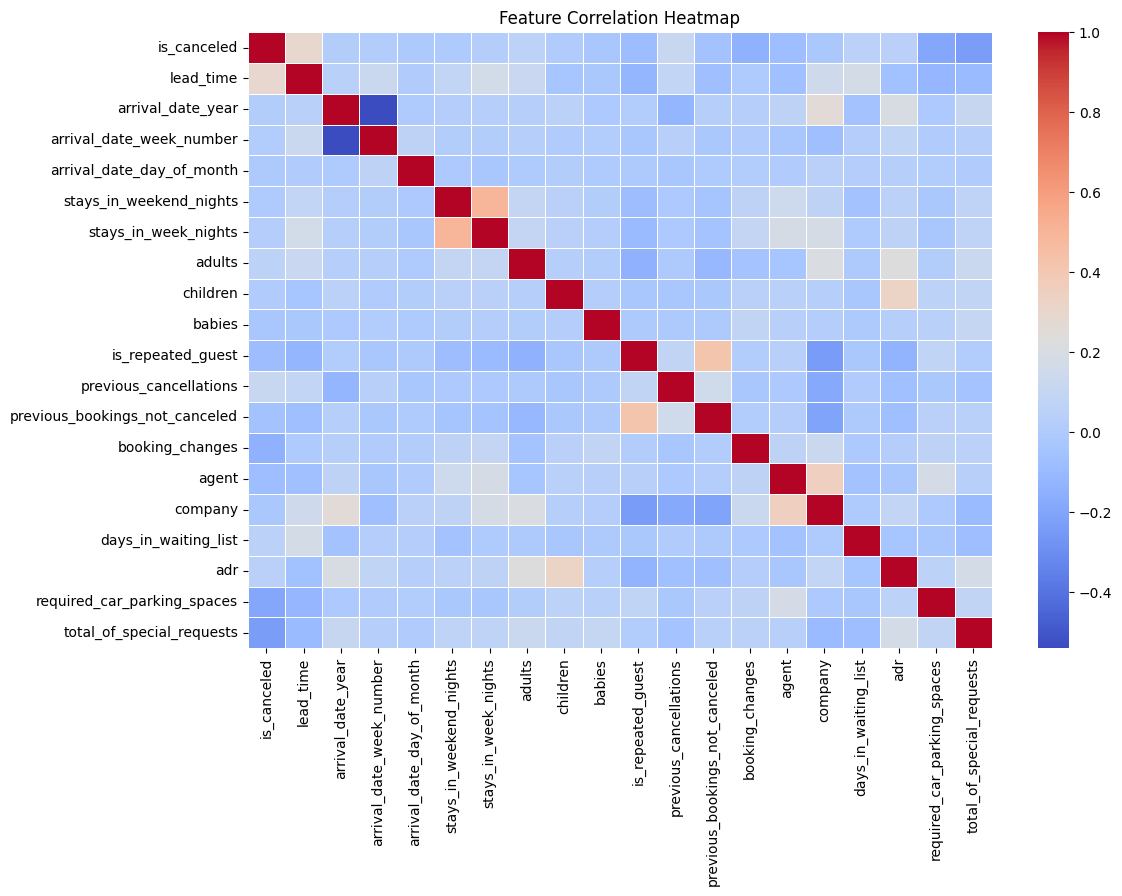

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 9: Preprocessing - Encoding & Scaling

In [ ]:
# Preprocessing - Encoding & Scaling
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X = preprocessor.fit_transform(X)

# Step 10: Split Data into Training and Testing Sets

In [ ]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 11: Train and Evaluate Classification Models

              precision    recall  f1-score   support

    Canceled       0.97      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.61      0.08      0.15       362

    accuracy                           0.99     35817
   macro avg       0.86      0.69      0.71     35817
weighted avg       0.99      0.99      0.99     35817



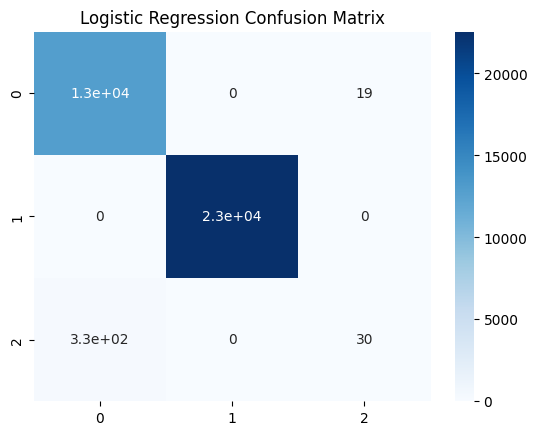

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='macro')
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.98      0.98      0.98     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.36      0.37      0.36       362

    accuracy                           0.99     35817
   macro avg       0.78      0.78      0.78     35817
weighted avg       0.99      0.99      0.99     35817



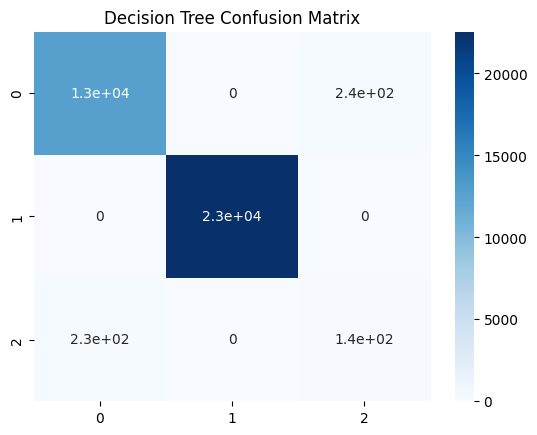

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='macro')
rec_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.98      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.89      0.26      0.40       362

    accuracy                           0.99     35817
   macro avg       0.96      0.75      0.80     35817
weighted avg       0.99      0.99      0.99     35817



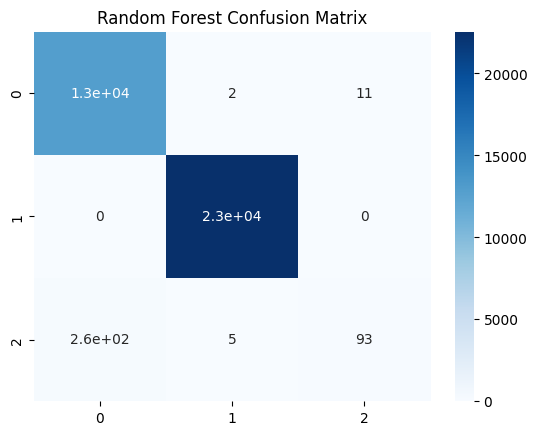

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.98      0.99      0.98     12905
   Check-Out       0.99      1.00      1.00     22550
     No-Show       0.75      0.19      0.30       362

    accuracy                           0.99     35817
   macro avg       0.91      0.73      0.76     35817
weighted avg       0.99      0.99      0.98     35817



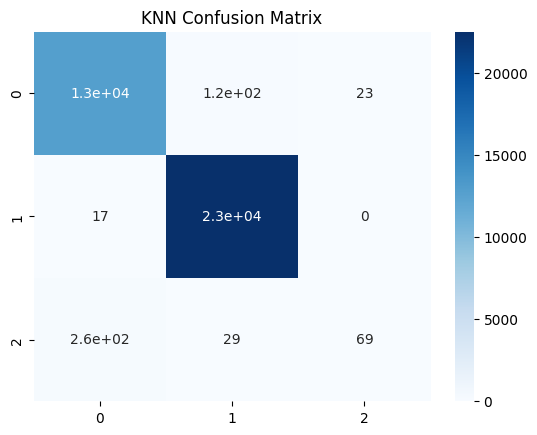

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='macro')
rec_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.97      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.00      0.00      0.00       362

    accuracy                           0.99     35817
   macro avg       0.66      0.67      0.66     35817
weighted avg       0.98      0.99      0.98     35817



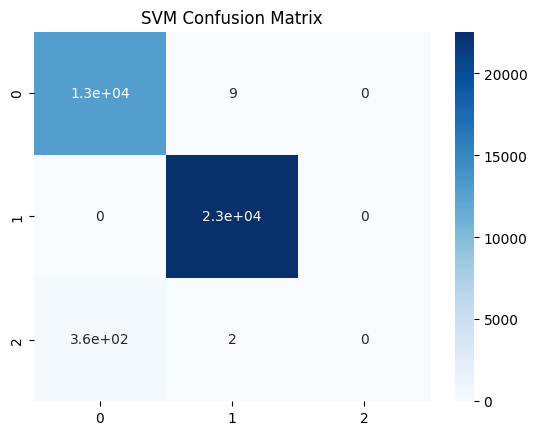

In [ ]:
#Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
rec_svm = recall_score(y_test, y_pred_svm, average='macro', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='macro', zero_division=0)
print(classification_report(y_test, y_pred_svm, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
classification_results_df = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN"],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_svm, acc_knn],
    'Precision': [prec_lr, prec_dt, prec_rf, prec_svm, prec_knn],
    'Recall': [rec_lr, rec_dt, rec_rf, rec_svm, rec_knn],
    'F1 Score': [f1_lr, f1_dt, f1_rf, f1_svm, f1_knn]
})

In [ ]:
print("\n🔎 Classification Models Comparison:")
print(classification_results_df.sort_values(by='Accuracy', ascending=False))


🔎 Classification Models Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.992127   0.957951  0.751966  0.796119
0  Logistic Regression  0.990200   0.862376  0.693800  0.710850
3                  SVM  0.989642   0.657452  0.666434  0.661884
4                  KNN  0.987380   0.907311  0.726283  0.761339
1        Decision Tree  0.986878   0.779844  0.784699  0.782215


# Step 12: Train and Evaluate Ensemble Models

              precision    recall  f1-score   support

    Canceled       0.98      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.70      0.29      0.41       362

    accuracy                           0.99     35817
   macro avg       0.90      0.76      0.80     35817
weighted avg       0.99      0.99      0.99     35817



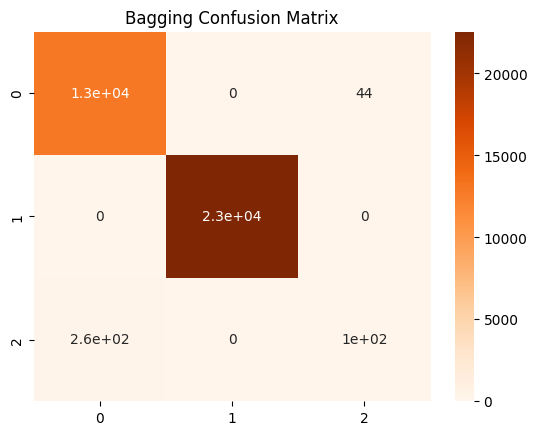

In [ ]:
# Bagging
bag = BaggingClassifier(estimator=DecisionTreeClassifier())
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
prec_bag = precision_score(y_test, y_pred_bag, average='macro')
rec_bag = recall_score(y_test, y_pred_bag, average='macro')
f1_bag = f1_score(y_test, y_pred_bag, average='macro')
print(classification_report(y_test, y_pred_bag))
sns.heatmap(confusion_matrix(y_test, y_pred_bag), annot=True, cmap="Oranges")
plt.title("Bagging Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.97      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.84      0.07      0.13       362

    accuracy                           0.99     35817
   macro avg       0.94      0.69      0.71     35817
weighted avg       0.99      0.99      0.99     35817



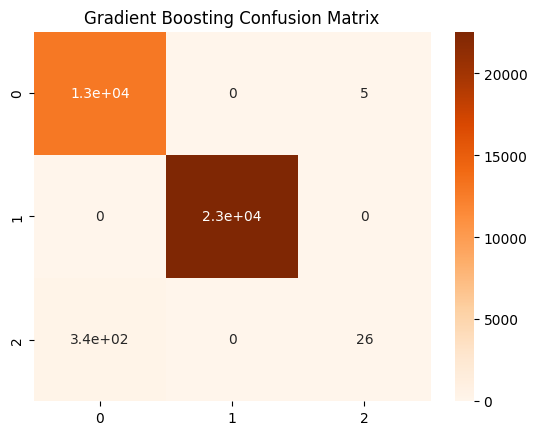

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb, average='macro')
rec_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, cmap="Oranges")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.97      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.00      0.00      0.00       362

    accuracy                           0.99     35817
   macro avg       0.66      0.67      0.66     35817
weighted avg       0.98      0.99      0.98     35817



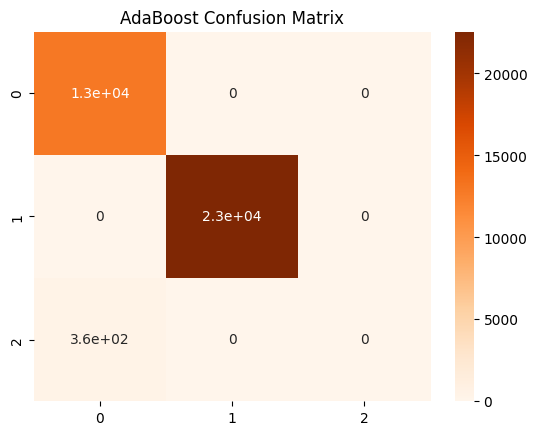

In [ ]:
# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
prec_ada = precision_score(y_test, y_pred_ada, average='macro', zero_division=0)
rec_ada = recall_score(y_test, y_pred_ada, average='macro', zero_division=0)
f1_ada = f1_score(y_test, y_pred_ada, average='macro', zero_division=0)
print(classification_report(y_test, y_pred_ada, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, cmap="Oranges")
plt.title("AdaBoost Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

    Canceled       0.98      1.00      0.99     12905
   Check-Out       1.00      1.00      1.00     22550
     No-Show       0.74      0.31      0.44       362

    accuracy                           0.99     35817
   macro avg       0.91      0.77      0.81     35817
weighted avg       0.99      0.99      0.99     35817



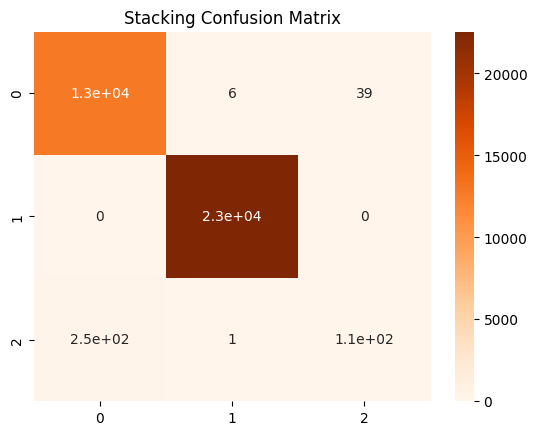

In [ ]:
# Stacking
stack = StackingClassifier(estimators=[("rf", RandomForestClassifier()), ("svm", SVC())], final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack, average='macro')
rec_stack = recall_score(y_test, y_pred_stack, average='macro')
f1_stack = f1_score(y_test, y_pred_stack, average='macro')
print(classification_report(y_test, y_pred_stack))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, cmap="Oranges")
plt.title("Stacking Confusion Matrix")
plt.show()

In [ ]:
ensemble_results_df = pd.DataFrame({
    'Ensemble Model': ["Bagging", "Gradient Boosting", "AdaBoost", "Stacking"],
    'Accuracy': [acc_bag, acc_gb, acc_ada, acc_stack],
    'Precision': [prec_bag, prec_gb, prec_ada, prec_stack],
    'Recall': [rec_bag, rec_gb, rec_ada, rec_stack],
    'F1 Score': [f1_bag, f1_gb, f1_ada, f1_stack]
})

In [ ]:
print("\n🔎 Ensemble Models Comparison:")
print(ensemble_results_df.sort_values(by='Accuracy', ascending=False))


🔎 Ensemble Models Comparison:
      Ensemble Model  Accuracy  Precision    Recall  F1 Score
3           Stacking  0.991792   0.908064  0.769556  0.809423
0            Bagging  0.991596   0.895036  0.762215  0.799797
1  Gradient Boosting  0.990479   0.937775  0.690479  0.706424
2           AdaBoost  0.989893   0.657571  0.666667  0.662056


#Step 13: Identify Best Model

In [ ]:
best_class_model = classification_results_df.sort_values(by='Accuracy', ascending=False).iloc[0, 0]
best_ensemble_model = ensemble_results_df.sort_values(by='Accuracy', ascending=False).iloc[0, 0]

In [ ]:
print(f"\n✅ Conclusion: The best individual classification model is {best_class_model}.")
print(f"✅ Conclusion: The best ensemble model is {best_ensemble_model}.")


✅ Conclusion: The best individual classification model is Random Forest.
✅ Conclusion: The best ensemble model is Stacking.
